<a href="https://colab.research.google.com/github/tommy-hartanto/Decision-Tree-To-Predict-Buying-Customers-of-An-Ecommerce/blob/main/Online_Shopper_Intention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Set Information

In [1]:
import pandas as pd

df = pd.read_csv('drive/MyDrive/Colab Notebooks/PP/P2/online_shoppers_intention.csv')
df.sample(3)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
3954,0,0.0,0,0.0,2,0.0,0.2,0.200000,0.0,0.0,May,2,2,3,6,Returning_Visitor,False,False
1404,1,14.0,0,0.0,10,90.0,0.0,0.018182,0.0,0.0,Mar,2,2,2,10,New_Visitor,False,False
9673,0,0.0,0,0.0,2,0.0,0.2,0.200000,0.0,0.0,Nov,1,1,9,1,Returning_Visitor,False,False


Derived from Kaggle:

- The dataset consists of feature vectors belonging to 12,330 sessions.
- The dataset was formed so that each session
would belong to a different user in a 1-year period to avoid any tendency to a specific campaign, special day, user profile, or period.

- The dataset consists of 10 numerical and 8 categorical attributes.
- The 'Revenue' attribute can be used as the class label.

- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "ProductRelated" and "Product Related Duration" represent the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories.
- The values of these features are derived from the URL information of the pages visited by the user and updated in real time when a user takes an action, e.g. moving from one page to another.
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site.
- The value of "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session.
- The value of "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that were the last in the session.
- The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction.
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8.
- The dataset also includes operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# EDA

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

- There are 12,330 rows each representing the behavior of one customer for a year.
- Column 'Revenue' is the feature target/ label.
- No column with inappropriate data type.
- No missing values found.

## Univariate Analysis

In [3]:
# Group features into numerical or categorical data
col_num = ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']
col_cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

df_num = df[col_num]
df_cat = df[col_cat]

### Numerical

In [4]:
df_num.describe(include='all')

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000


- Columns 'Informational', 'Informational_Duration', 'PageValues', and 'SpecialDay' have value '0' covering at least 75% of all rows.
- All the numerical columns are positively-skewed.

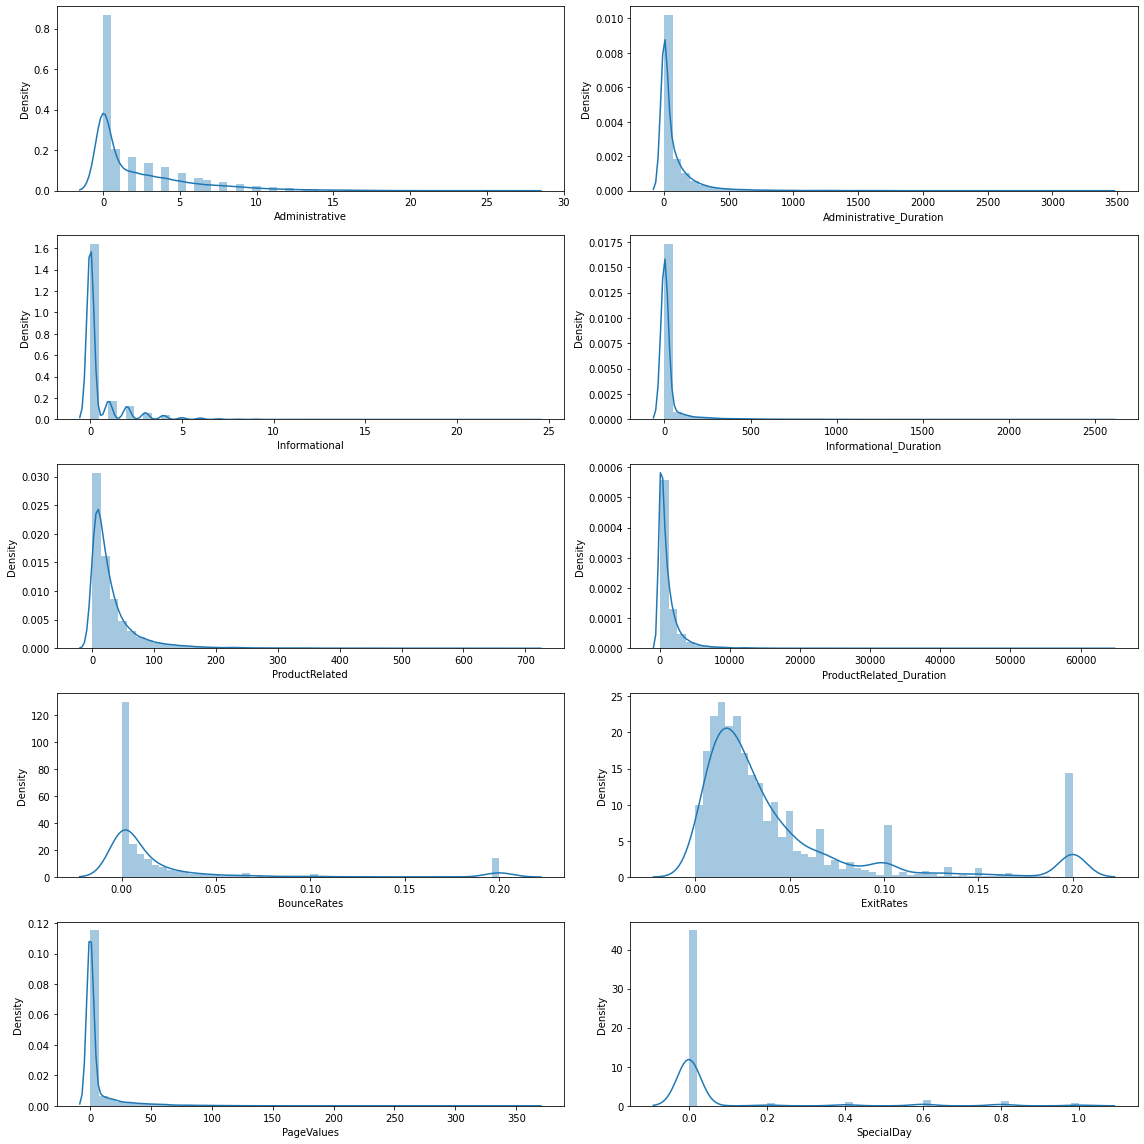

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(16, 16))

for i, k in enumerate(col_num):
  plt.subplot(5, 2, i+1)
  sns.distplot(df_num[k])

plt.tight_layout()

- 'Administrative', 'Informational', and 'ProductRelated' has better distribution than their counterparts.
- All features except 'ExitRates' has one dominant value.

### Categorical

In [6]:
df_cat.describe(include='all')

,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
count,12330,12330.000000,12330.000000,12330.000000,12330.000000,12330,12330,12330
unique,10,NaN,NaN,NaN,NaN,3,2,2
top,May,NaN,NaN,NaN,NaN,Returning_Visitor,False,False
freq,3364,NaN,NaN,NaN,NaN,10551,9462,10422
mean,NaN,2.124006,2.357097,3.147364,4.069586,NaN,NaN,NaN
std,NaN,0.911325,1.717277,2.401591,4.025169,NaN,NaN,NaN
min,NaN,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,NaN,2.000000,2.000000,1.000000,2.000000,NaN,NaN,NaN
50%,NaN,2.000000,2.000000,3.000000,2.000000,NaN,NaN,NaN
75%,NaN,3.000000,2.000000,4.000000,4.000000,NaN,NaN,NaN


- Column 'Month' only has 10 unique values, missing Jan and April.
- The value of Column 'VisitorType' consists of: 'New_visitor', 'Returning_Visitor', and 'Other'.
- Columns 'Browser', 'VisitorType', 'Weekend', and 'Revenue' has one value that dominates at least 50% of all rows.

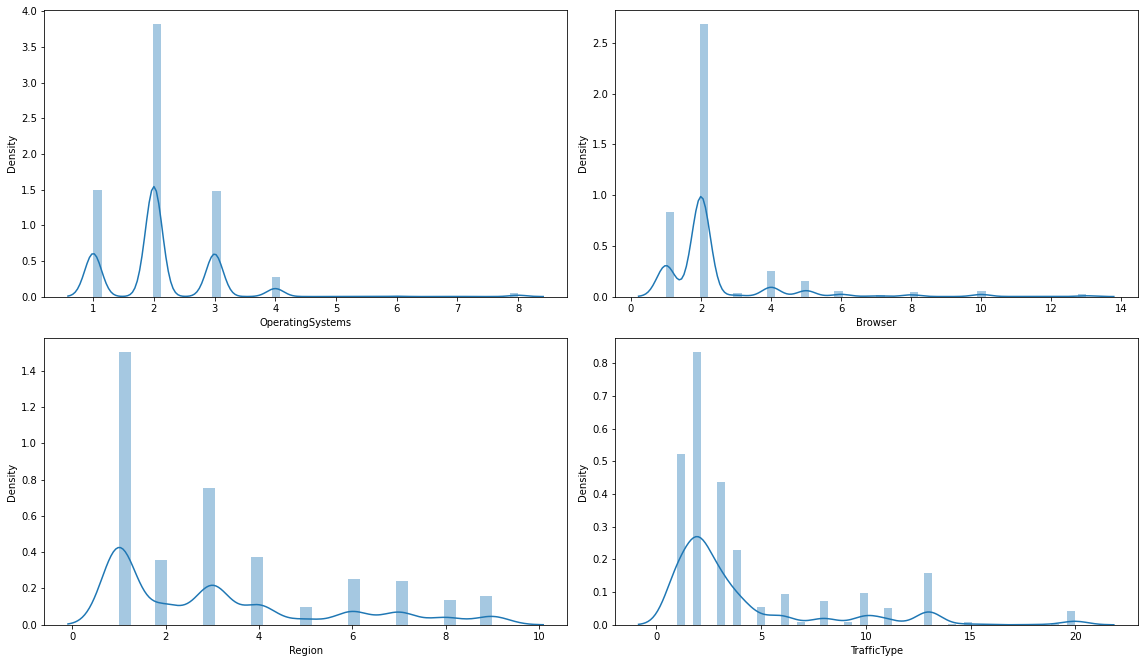

In [7]:
plt.figure(figsize=(16, 18))

for i, k in enumerate(['OperatingSystems', 'Browser', 'Region', 'TrafficType']):
  plt.subplot(4, 2, i+1)
  sns.distplot(df_cat[k])

plt.tight_layout()

- These four columns would need outlier handling to make the distributions more normal.

## Multivariate Analysis

### Pairplot

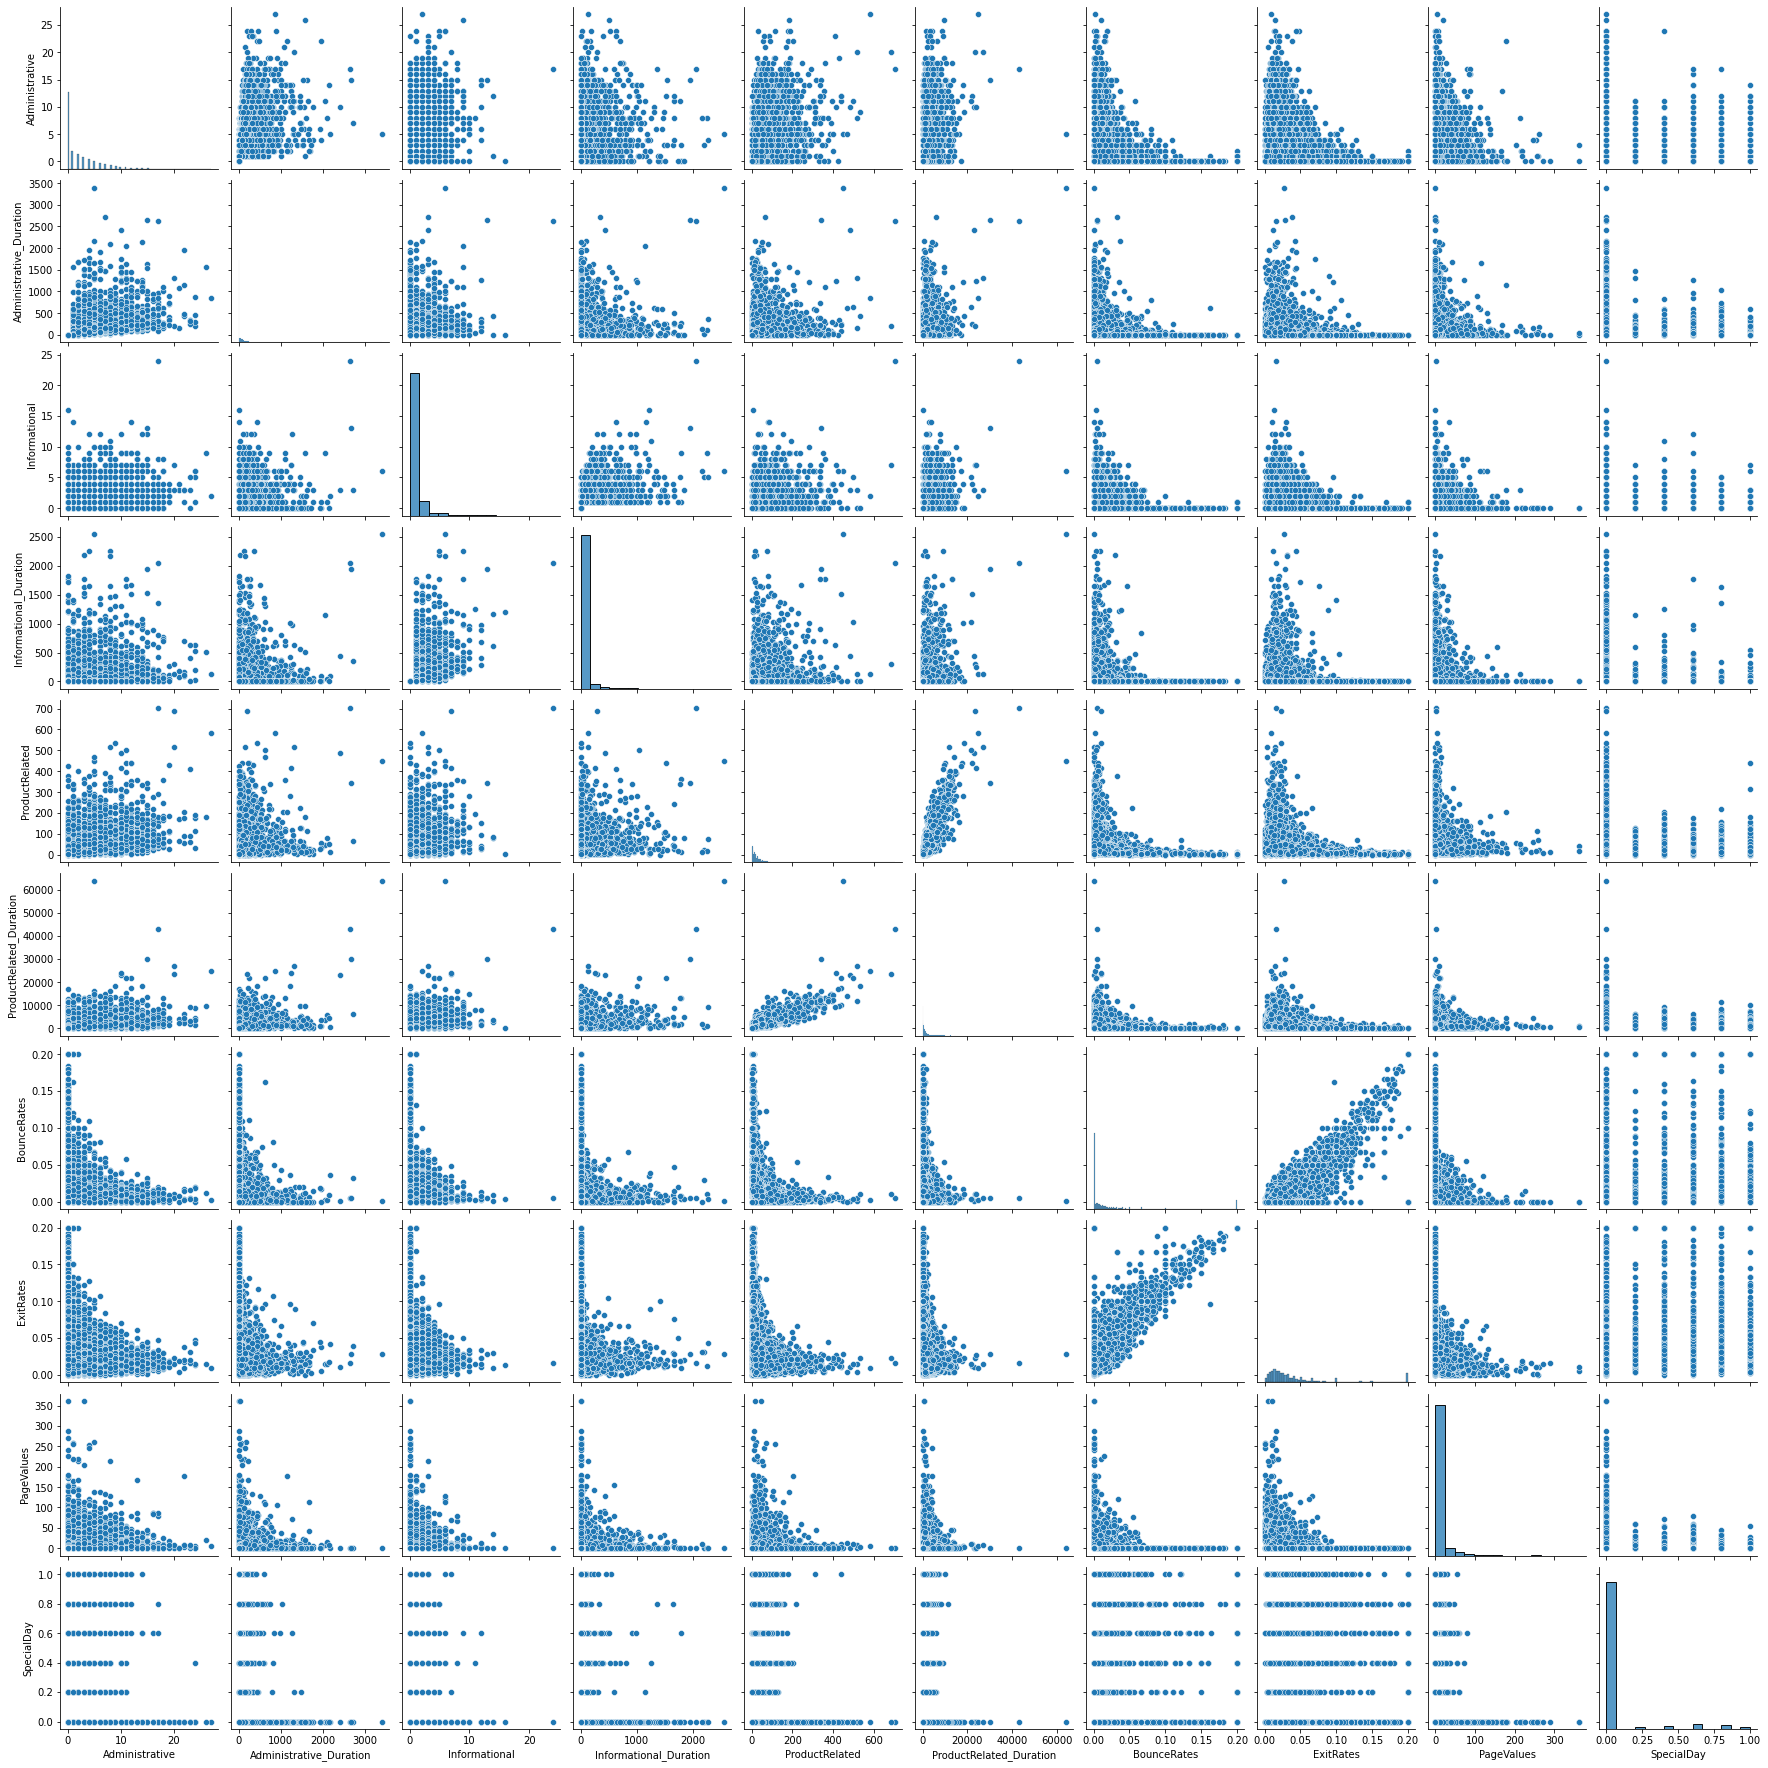

In [8]:
sns.pairplot(df_num)

- 'ExitRates' and 'BounceRates' has a positive correlation.
- 'ProductRelated' and 'ProductRelated_Duration' has a positive correlation.
- 'SpecialDay' has a negative correlation with the rest.

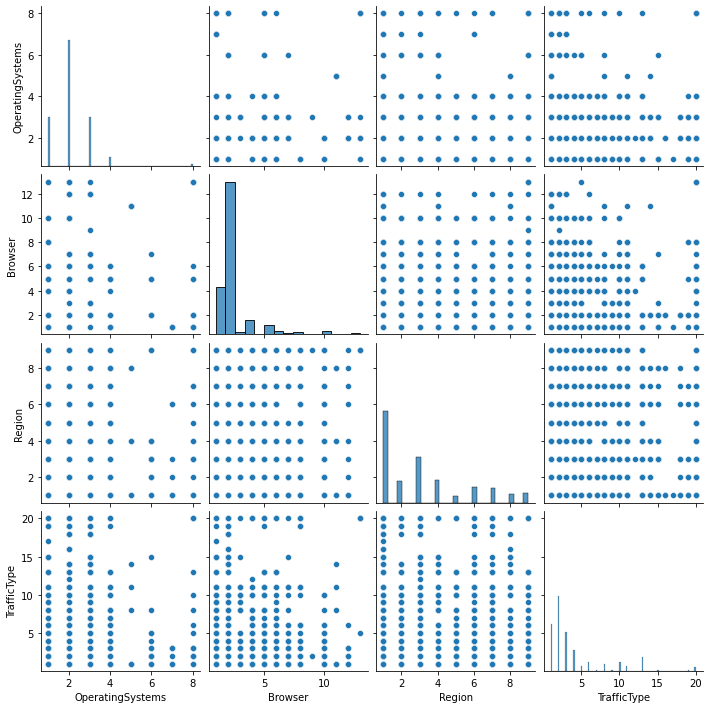

In [9]:
sns.pairplot(df[['OperatingSystems', 'Browser',	'Region', 'TrafficType', 'Month']])

- There don't seem to be any correlation.

### Correlation Heatmap

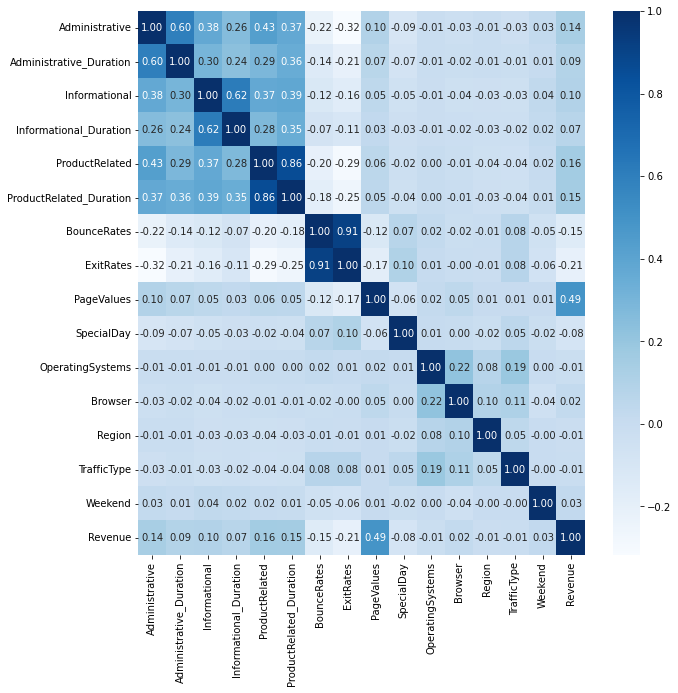

In [10]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

- 'ProductRelated' and 'ProductRelated_Duration' has a strong correlation, thus one of them will be dropped.
- 'ExitRates' and 'BounceRates' has a strong correlation, thus one of them will be dropped.
- 'Administrative' and 'Administrative_Duration' has a medium-high correlation, thus one of them will be dropped.
- 'Informational' and 'Informational_Duration' has a medium-high correlation, thus one of them will be dropped.
- 'PageValues' and 'Revenue' has a medium correlation, thus one of them might be dropped.

# Data Pre-Processing

## Remove Null Values

In [11]:
df.isnull().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
Month                      False
OperatingSystems           False
Browser                    False
Region                     False
TrafficType                False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

No null value detected.

## Remove Duplicated Data

In [12]:
df.duplicated().sum()

125

In [13]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

125 duplicates are removed.

## Remove Multicolinearity

Following the findings in Correlation Heatmap, I need to outline the reason to drop one feature and not the other.

3 of them have related background:
- 'ProductRelated' and 'ProductRelated_Duration' ---> **'ProductRelated_Duration' will be removed**
- 'Administrative' and 'Administrative_Duration' ---> **'Administrative_Duration' will be removed**
- 'Informational' and 'Informational_Duration' ---> **'Informational_Duration' will be removed**

These features are kept because their distribution is better for modeling, and that they also share a similar element.

The other 2 correlated pairs are:
- 'ExitRates' and 'BounceRates' ---> **'BounceRates' will be removed**
- 'PageValues' and 'Revenue' ---> **'PageValues' will be removed**

'BounceRates' will be removed because it explains more about why people visit than why people exit. If the focus of the experiment is revenue, than people exiting is more important in terms of funnel.

'PageValues' will be removed because 'Revenue' is the target. 'Revenue' should not be removed.

Although these features will be dropped for modeling, **they still contribute to insights and recommendations as necessary.**

In [14]:
df.drop(['ProductRelated_Duration', 'Administrative_Duration', 'Informational_Duration', 'BounceRates', 'PageValues'], axis=1, inplace=True)
df.columns

Index(['Administrative', 'Informational', 'ProductRelated', 'ExitRates',
       'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region',
       'TrafficType', 'VisitorType', 'Weekend', 'Revenue'],
      dtype='object')

In [15]:
# Group features into numerical or categorical data (Updated)
col_num = ['Administrative', 'Informational', 'ProductRelated', 'ExitRates', 'SpecialDay']
col_cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

df_num = df[col_num]
df_cat = df[col_cat]

## Remove Outlier

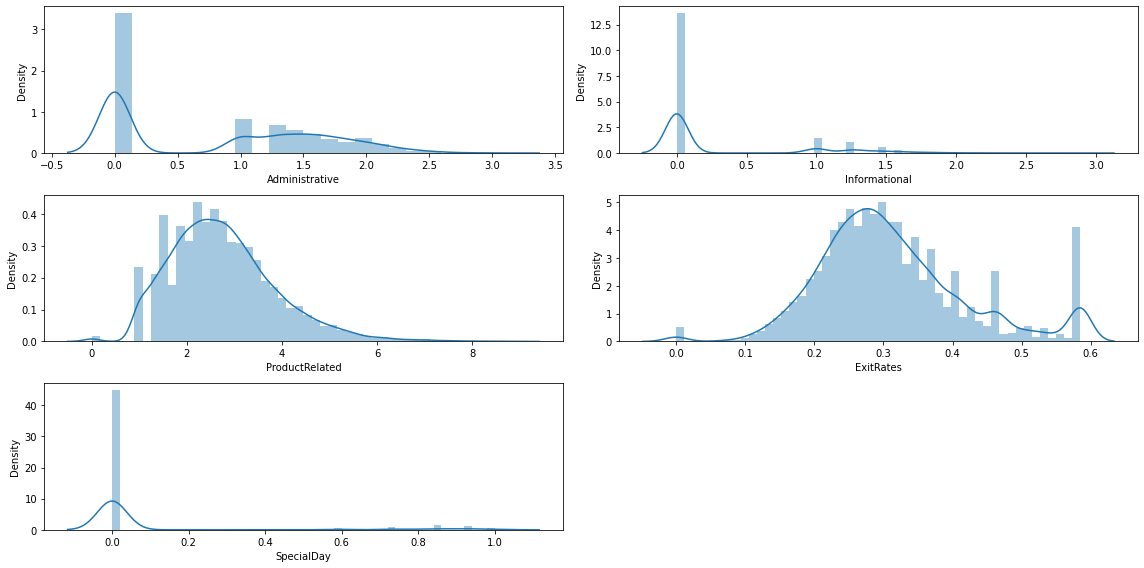

In [16]:
import numpy as np

plt.figure(figsize=(16, 8))

for i, k in enumerate(col_num):
  plt.subplot(3, 2, i+1)
  sns.distplot(np.cbrt(df_num[k]))

plt.tight_layout()

- Only 'ProductRelated' and 'ExitRates' will undergo Cube Root Transformation.
- Cube Root Transformation is selected because it results more normal distribution than Log and Square Root Transformation.
- The rest will not have their outliers removed because their distributions don't allow it.

In [17]:
from scipy import stats

df['log_prod'] = np.cbrt(df['ProductRelated'])
df = df.drop(columns='ProductRelated')
prod_zscore = np.abs(stats.zscore(df['log_prod']))
prod_filter = (prod_zscore < 3)

len_df = int(len(df))
print(f'No of row before outlier filtering: {len_df}')
df = df[prod_filter]
print(f'No of row after outlier filtering with z-score: {len(df)} or reduced by {round((len_df - df.shape[0])/len_df*100, 2)}%')

No of row before outlier filtering: 12205
No of row after outlier filtering with z-score: 12090 or reduced by 0.94%


In [18]:
df['log_exra'] = np.cbrt(df['ExitRates'])
df = df.drop(columns='ExitRates')
exra_zscore = np.abs(stats.zscore(df['log_exra']))
exra_filter = (exra_zscore < 3)

len_df = int(len(df))
print(f'No of row before outlier filtering: {len_df}')
df = df[exra_filter]
print(f'No of row after outlier filtering with z-score: {len(df)} or reduced by {round((len_df - df.shape[0])/len_df*100, 2)}%')

No of row before outlier filtering: 12090
No of row after outlier filtering with z-score: 12090 or reduced by 0.0%


In [19]:
# Group features into numerical or categorical data (Updated Again)
col_num = ['Administrative', 'Informational', 'log_prod', 'log_exra', 'SpecialDay']
col_cat = ['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

df_num = df[col_num]
df_cat = df[col_cat]

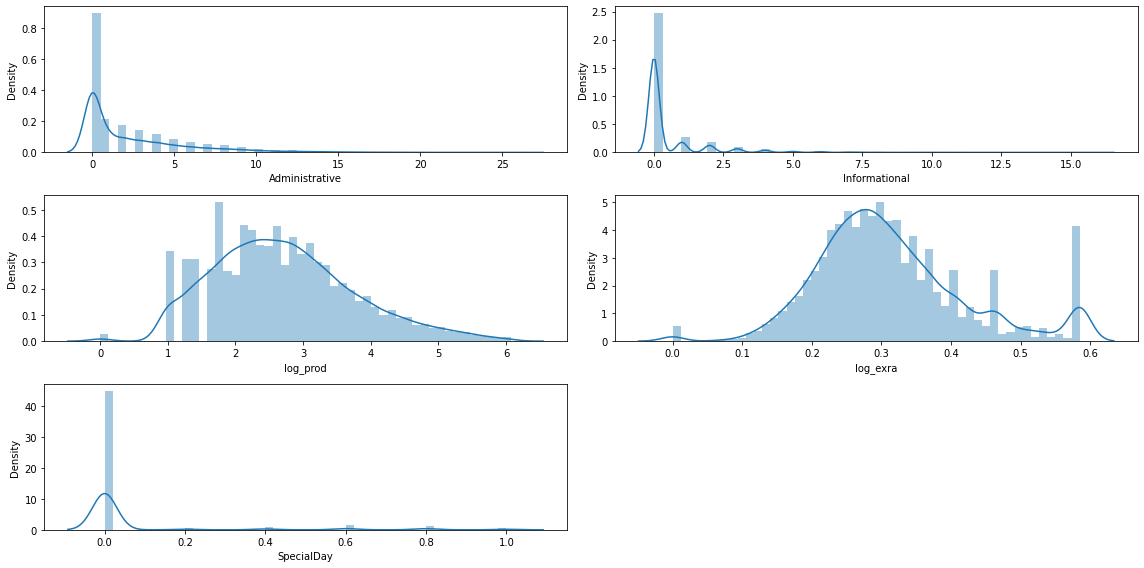

In [20]:
plt.figure(figsize=(16, 8))

for i, k in enumerate(col_num):
  plt.subplot(3, 2, i+1)
  sns.distplot(df_num[k])

plt.tight_layout()

## Data Scaling

In [21]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df['log_prod'] = StandardScaler().fit_transform(df['log_prod'].values.reshape(len(df), 1))
df['log_exra'] = StandardScaler().fit_transform(df['log_exra'].values.reshape(len(df), 1))
df['Administrative'] = MinMaxScaler().fit_transform(df['Administrative'].values.reshape(len(df), 1))
df['Informational'] = MinMaxScaler().fit_transform(df['Informational'].values.reshape(len(df), 1))
df['SpecialDay'] = MinMaxScaler().fit_transform(df['SpecialDay'].values.reshape(len(df), 1))

## Encoding

In [22]:
df['Month'] = df['Month'].map({
                              'Feb' : 1,
                              'Mar' : 2,
                              'May' : 4,
                              'June' : 5,
                              'Jul' : 6,
                              'Aug' : 7,
                              'Sep' : 8,
                              'Oct' : 9,
                              'Nov' : 10,
                              'Dec' : 11
                             })

df['Weekend'] = df['Weekend'].map({True : 1, False: 0})

df['Revenue'] = df['Revenue'].map({True: 1, False: 0})

df = df.join(pd.get_dummies(df['VisitorType'], prefix='VisitorType'))

In [23]:
df.drop('VisitorType', axis=1, inplace=True)
df.columns

Index(['Administrative', 'Informational', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend',
       'Revenue', 'log_prod', 'log_exra', 'VisitorType_New_Visitor',
       'VisitorType_Other', 'VisitorType_Returning_Visitor'],
      dtype='object')

# Split Data Train & Test

In [24]:
df.describe(include='all')

,Administrative,Informational,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,log_prod,log_exra,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor
count,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,12090.000000,1.209000e+04,1.209000e+04,12090.00000,12090.000000,12090.000000
mean,0.088016,0.030413,0.062366,6.647312,2.123821,2.359140,3.158809,4.078577,0.234243,0.154260,1.128405e-16,-3.561529e-16,0.13995,0.006700,0.853350
std,0.125530,0.076299,0.200160,3.389440,0.909397,1.715293,2.402144,4.014814,0.423542,0.361212,1.000041e+00,1.000041e+00,0.34695,0.081581,0.353771
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,-2.609638e+00,-2.903456e+00,0.00000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,4.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,-7.692018e-01,-6.397651e-01,0.00000,0.000000,1.000000
50%,0.038462,0.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,0.000000,-8.821564e-02,-1.753310e-01,0.00000,0.000000,1.000000
75%,0.153846,0.000000,0.000000,10.000000,3.000000,2.000000,4.000000,4.000000,0.000000,0.000000,5.963016e-01,5.330968e-01,0.00000,0.000000,1.000000
max,1.000000,1.000000,1.000000,11.000000,8.000000,13.000000,9.000000,20.000000,1.000000,1.000000,3.233383e+00,2.552361e+00,1.00000,1.000000,1.000000


In [25]:
# Split Feature and Label
X = df.drop(columns=['Revenue'])
y = df['Revenue'] # target / label

#Splitting the data into Train and Test
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 33)

In [26]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(0.5, random_state = 33)
X_train_oversampled, y_train_oversampled = sm.fit_resample(X_train, y_train)
X_train = pd.DataFrame(X_train_oversampled, columns=X_train.columns)
y_train = pd.Series(y_train_oversampled)

In [27]:
print('Shape of Training set : ',X_train.shape )
print('\n')
print('Shape of test set : ',X_test.shape )
print('\n')
print('Percentage of classes in training set:\n',y_train.value_counts(normalize=True)*100)
print('\n')
print('Percentage of classes in test set:\n',y_test.value_counts(normalize=True)*100)

Shape of Training set :  (10774, 14)


Shape of test set :  (3627, 14)


Percentage of classes in training set:
 0    66.669761
1    33.330239
Name: Revenue, dtype: float64


Percentage of classes in test set:
 0    83.870968
1    16.129032
Name: Revenue, dtype: float64


# Decision Tree Modeling

## Model Fitting

In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

def eval_classification(model, X_train, y_train, X_test, y_test, threshold=0.2, flag=True, roc=True ):
    
    pred_train = (model.predict_proba(X_train)[:,1]>threshold)
    pred_test = (model.predict_proba(X_test)[:,1]>threshold)

    pred_train = np.round(pred_train)
    pred_test = np.round(pred_test)
    
    train_acc = accuracy_score(pred_train,y_train)
    test_acc = accuracy_score(pred_test,y_test)
    
    train_recall = recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)
    
    train_precision = precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)
    
    train_f1 = f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)
          
    
    if flag == True: 
        print("Accuracy on training set : ",accuracy_score(pred_train,y_train))
        print("Accuracy on test set : ",accuracy_score(pred_test,y_test))
        print("Recall on training set : ",recall_score(y_train,pred_train))
        print("Recall on test set : ",recall_score(y_test,pred_test))
        print("Precision on training set : ",precision_score(y_train,pred_train))
        print("Precision on test set : ",precision_score(y_test,pred_test))
        print("F1 on training set : ",f1_score(y_train,pred_train))
        print("F1 on test set : ",f1_score(y_test,pred_test))
   
    if roc == True:
        pred_train_prob = model.predict_proba(X_train)[:,1]
        pred_test_prob = model.predict_proba(X_test)[:,1]
        print("ROC-AUC Score on training set : ",roc_auc_score(y_train,pred_train))
        print("ROC-AUC Score on test set : ",roc_auc_score(y_test,pred_test))
        print("PR-AUC Score on training set : ",average_precision_score(y_train,pred_train))
        print("PR-AUC Score on test set : ",average_precision_score(y_test,pred_test))

In [29]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=33,
                               class_weight={0:0.15,1:0.85},
                               max_depth=3,
                               max_features='sqrt',
                               min_samples_leaf=156,
                               min_samples_split=66)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.4115463152032671
Accuracy on test set :  0.26082161566032536
Recall on training set :  0.9991645781119465
Recall on test set :  0.9931623931623932
Precision on training set :  0.36151133501259447
Precision on test set :  0.17833026396562307
F1 on training set :  0.5309263095590412
F1 on test set :  0.30236794171220405
ROC-AUC Score on training set :  0.5584713326310811
ROC-AUC Score on test set :  0.5565746219592373
PR-AUC Score on training set :  0.36148776864637994
PR-AUC Score on test set :  0.17821375154589672


The parameters used are as following:
- random_state=33,
- class_weight={0:0.15,1:0.85},
- max_depth=3,
- max_features='sqrt',
- min_samples_leaf=156,
- min_samples_split=66

With threshold set at 0.2.

The primary metric is recall:
- Training score: 99.9%
- Testing score:99.3

The secondary metric is ROC-AUC:
- Training score: 55.8%
- Testing score: 55.6%

All the metrics have achieved best-fit.

## Visualization

In [30]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

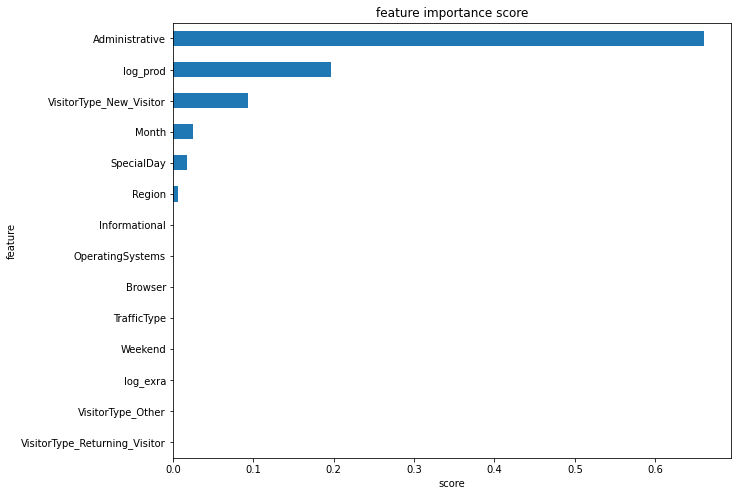

In [31]:
show_feature_importance(model)

## Final Model

In [32]:
model = DecisionTreeClassifier(random_state=33,
                               class_weight={0:0.15,1:0.85},
                               max_depth=3,
                               max_features='sqrt',
                               min_samples_leaf=156,
                               min_samples_split=66)

for i in ['VisitorType_Returning_Visitor', 'VisitorType_Other']:
  print('drop', i)
  X_train.drop(i, axis=1, inplace=True)
  X_test.drop(i, axis=1, inplace=True)
  model.fit(X_train,y_train)
  eval_classification(model, X_train, y_train, X_test, y_test)

drop VisitorType_Returning_Visitor
Accuracy on training set :  0.3740486356042324
Accuracy on test set :  0.2142266335814723
Recall on training set :  0.998886104149262
Recall on test set :  0.9897435897435898
Precision on training set :  0.347341919240825
Precision on test set :  0.1691498685363716
F1 on training set :  0.5154476217847391
F1 on test set :  0.28892215568862273
ROC-AUC Score on training set :  0.5302797498332278
ROC-AUC Score on test set :  0.5274161735700198
PR-AUC Score on training set :  0.3473262806726412
PR-AUC Score on test set :  0.16906925780862056
drop VisitorType_Other
Accuracy on training set :  0.47948765546686467
Accuracy on test set :  0.35208161014612627
Recall on training set :  0.9902534113060428
Recall on test set :  0.9811965811965812
Precision on training set :  0.3895278781903823
Precision on test set :  0.1970477171301064
F1 on training set :  0.5591194968553459
F1 on test set :  0.3281875357347055
ROC-AUC Score on training set :  0.607196871321962

After removing the least importance features one by one, better result is discovered. The features aforementioned are:
- VisitorType_Returning_Visitor
- VisitorType_Other'

Finally, the revisioned score are as following:
- Recall:
  - Training score: 99.0%
  - Testing score:98.1
- ROC-AUC:
  - Training score: 60.7%
  - Testing score: 60.6%

Although the recall score is reduced a little by 1.2%, the ROC_AUC score improved considerably better by 5%.

In [33]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=33,
                               class_weight={0:0.15,1:0.85},
                               max_depth=3,
                               max_features='sqrt',
                               min_samples_leaf=156,
                               min_samples_split=66)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_pred_train = model.predict(X_train)
eval_classification(model, X_train, y_train, X_test, y_test)

Accuracy on training set :  0.47948765546686467
Accuracy on test set :  0.35208161014612627
Recall on training set :  0.9902534113060428
Recall on test set :  0.9811965811965812
Precision on training set :  0.3895278781903823
Precision on test set :  0.1970477171301064
F1 on training set :  0.5591194968553459
F1 on test set :  0.3281875357347055
ROC-AUC Score on training set :  0.607196871321962
ROC-AUC Score on test set :  0.606147271531887
PR-AUC Score on training set :  0.3889798715282324
PR-AUC Score on test set :  0.1963753558650738


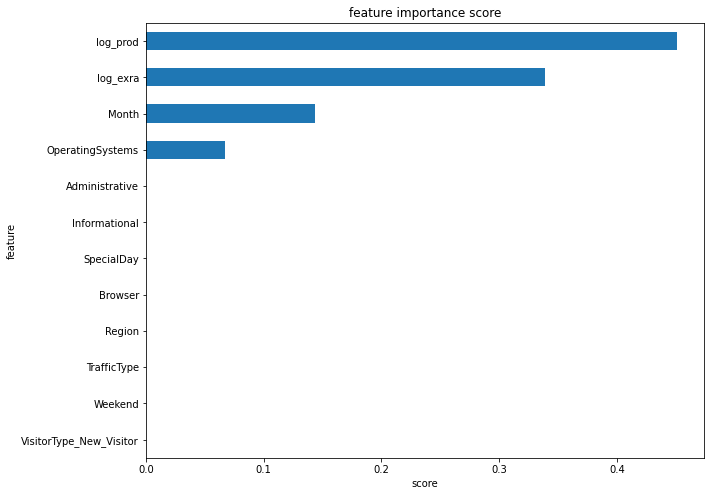

In [34]:
show_feature_importance(model)

['Administrative', 'Informational', 'SpecialDay', 'Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'Weekend', 'log_prod', 'log_exra', 'VisitorType_New_Visitor']


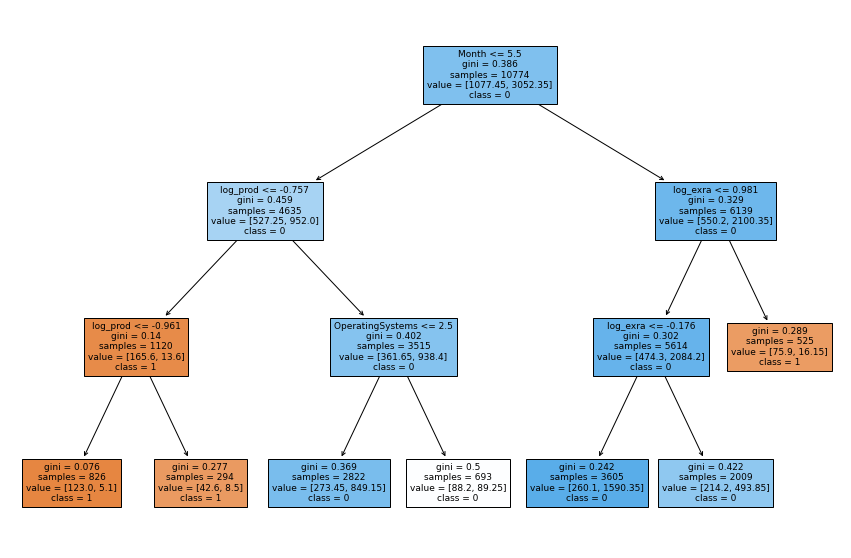

In [35]:
## Decision Tree Visualization
feature_names = list(X_train.columns)
print(feature_names)
from sklearn import tree

plt.figure(figsize=(15,10))
feature_names = X_train.columns
out = tree.plot_tree(model,feature_names=feature_names,filled=True,fontsize=9,class_names=['1','0'])
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)
plt.show()